In [1]:
!pip install yfinance

### <a></a>ARIMA MODEL
ARIMA MODEL WITHOUT VISUALIZATION



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from time import time
import datetime
import warnings

warnings.filterwarnings('ignore')

Enter stock ticker symbol (e.g., 'AAPL'):  AAPL
Enter start date (YYYY-MM-DD):  2020-01-01
Enter end date (YYYY-MM-DD):  2024-11-11


[*********************100%***********************]  1 of 1 completed


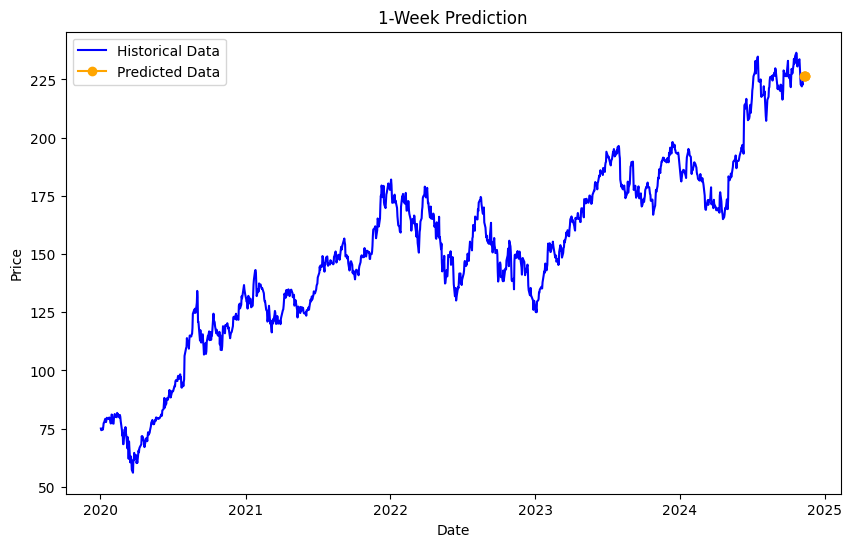

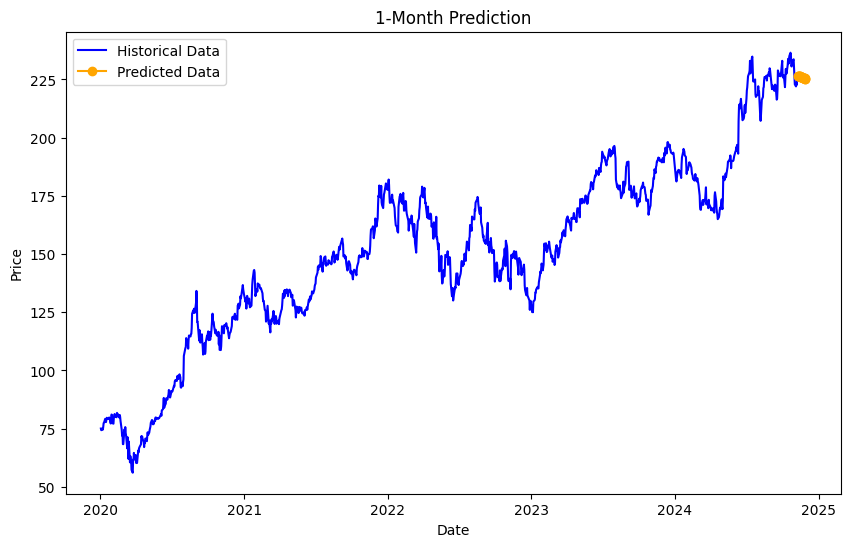

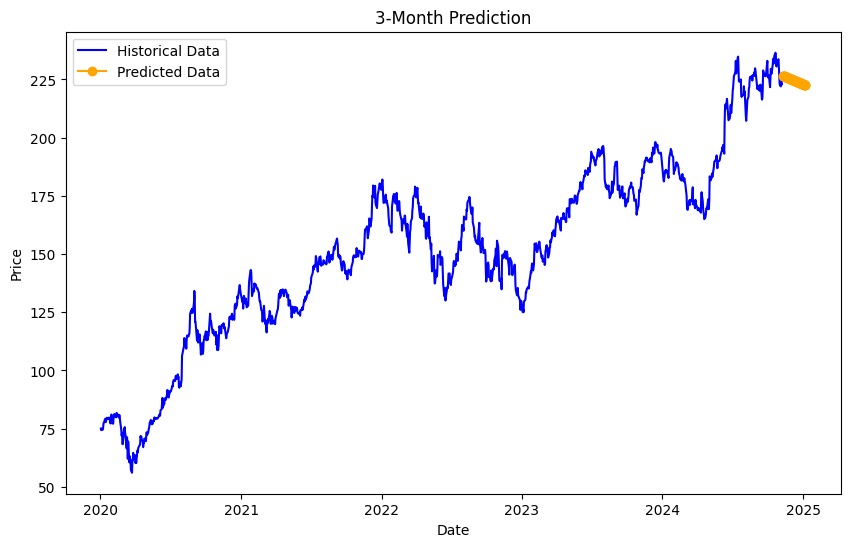

In [3]:
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt

# 1. Function to download stock data
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    if stock_data.empty:
        raise ValueError("No data fetched for the given ticker and date range.")
    return stock_data

# 2. Function to get the most recent closing price
def get_current_price(data):
    if data.empty:
        raise ValueError("Data is empty.")
    current_price = data['Close'].iloc[-1]  # Latest closing price
    return current_price

# 3. ARIMA prediction function (returns predictions as a list)
def arima_predict(data, steps=5):
    model = ARIMA(data['Close'].dropna(), order=(7, 0, 6))  # Fit ARIMA model
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)  # Predict future steps
    return list(forecast)  # Return predictions as a list

# 4. Function to get future prices for the next week, month, and 3 months
def get_future_prices(data, weeks=5, months=20, months_3=60):
    try:
        # Predict for the next 5 days (1 week)
        week_prices = arima_predict(data, steps=weeks)
        
        # Predict for the next month (approx 20 trading days)
        month_prices = arima_predict(data, steps=months)
        
        # Predict for the next 3 months (approx 60 trading days)
        three_month_prices = arima_predict(data, steps=months_3)
        
        # Create future dates for each prediction
        future_dates_week = [data.index[-1] + timedelta(days=i) for i in range(1, weeks+1)]
        future_dates_month = [data.index[-1] + timedelta(days=i) for i in range(1, months+1)]
        future_dates_3months = [data.index[-1] + timedelta(days=i) for i in range(1, months_3+1)]
        
        return future_dates_week, week_prices, future_dates_month, month_prices, future_dates_3months, three_month_prices
    except Exception as e:
        print(f"Error in getting future prices: {e}")
        return [], [], [], [], [], []

# 5. Plotting function for historical and predicted data
def plot_predictions(data, future_dates, future_prices, title):
    plt.figure(figsize=(10, 6))
    # Plot historical data
    plt.plot(data.index, data['Close'], label='Historical Data', color='blue')
    # Plot future predictions
    plt.plot(future_dates, future_prices, label='Predicted Data', color='orange', marker='o')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Example usage
ticker = input("Enter stock ticker symbol (e.g., 'AAPL'): ").strip().upper()
start_date = input("Enter start date (YYYY-MM-DD): ").strip()
end_date = input("Enter end date (YYYY-MM-DD): ").strip()
# Fetch stock data
data = get_stock_data(ticker, start_date, end_date)

# Get the current stock price
current_price = get_current_price(data)

# Get future prices for the next week, month, and 3 months
future_dates_week, week_prices, future_dates_month, month_prices, future_dates_3months, three_month_prices = get_future_prices(data)

# Plot historical and future predictions
plot_predictions(data, future_dates_week, week_prices, "1-Week Prediction")
plot_predictions(data, future_dates_month, month_prices, "1-Month Prediction")
plot_predictions(data, future_dates_3months, three_month_prices, "3-Month Prediction")


In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


### <a></a>ARIMA MODEL FINAL
ARIMA MODEL WITH VISUALIZATION


In [6]:
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta
import numpy as np
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output, State
import pandas as pd
import dash_table

# Initialize Dash app
app = Dash(__name__)

# 1. Function to download stock data
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    if stock_data.empty:
        raise ValueError("No data fetched for the given ticker and date range.")
    return stock_data

# 2. ARIMA prediction function
def arima_predict(data, steps=5):
    model = ARIMA(data['Close'].dropna(), order=(7, 0, 6))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return list(forecast)

# 3. Function to get future prices for the next week, month, and 3 months
def get_future_prices(data, weeks=7, months=30, months_3=90):
    try:
        # Week predictions
        week_prices = arima_predict(data, steps=weeks)
        future_dates_week = [data.index[-1] + timedelta(days=i) for i in range(1, weeks+1)]
        
        # Month predictions
        month_prices = arima_predict(data, steps=months)
        future_dates_month = [data.index[-1] + timedelta(days=i) for i in range(1, months+1)]
        
        # 3-Month predictions
        three_month_prices = arima_predict(data, steps=months_3)
        future_dates_3months = [data.index[-1] + timedelta(days=i) for i in range(1, months_3+1)]
        
        return future_dates_week, week_prices, future_dates_month, month_prices, future_dates_3months, three_month_prices
    except Exception as e:
        print(f"Error in getting future prices: {e}")
        return [], [], [], [], [], []

# 4. Function to generate recommendations
def generate_recommendations(current_price, week_prices, month_prices, three_month_prices):
    recommendations = {}
    
    def get_recommendation(end_price):
        percent_change = ((end_price - current_price) / current_price) * 100
        if percent_change > 2:
            recommendation = "Buy"
        else:
            recommendation = "Hold/Wait"
        return recommendation, percent_change
    
    if week_prices:
        recommendations["1 Week"] = get_recommendation(week_prices[-1])
    if month_prices:
        recommendations["1 Month"] = get_recommendation(month_prices[-1])
    if three_month_prices:
        recommendations["3 Months"] = get_recommendation(three_month_prices[-1])
    
    return recommendations

# Define app layout
app.layout = html.Div([
    html.H1("Stock Prediction Visualization with Recommendations"),
    
    # User input for stock ticker
    html.Div([
        html.Label("Enter Stock Ticker Symbol:"),
        dcc.Input(
            id="company-name",
            type="text",
            placeholder="e.g., AAPL",
            value="AAPL",  # Default value
            style={'marginRight': '10px'}
        ),
    ], style={'marginBottom': '10px'}),
    
    # User input for start and end dates
    html.Div([
        html.Label("Start Date:"),
        dcc.Input(
            id="start-date",
            type="text",
            placeholder="YYYY-MM-DD",
            value="2023-01-01",
            style={'marginRight': '10px'}
        ),
        html.Label("End Date:"),
        dcc.Input(
            id="end-date",
            type="text",
            placeholder="YYYY-MM-DD",
            value="2024-11-11",
            style={'marginRight': '10px'}
        ),
    ], style={'marginBottom': '10px'}),
    
    # Submit button
    html.Button('Submit', id='submit-button', n_clicks=0, style={'marginBottom': '20px'}),
    
    # Dropdown for prediction range selection
    html.Label("Select Prediction Range:"),
    dcc.Dropdown(
        id="range-selector",
        options=[
            {"label": "1 Week", "value": "week"},
            {"label": "1 Month", "value": "month"},
            {"label": "3 Months", "value": "3months"}
        ],
        value="week",
        style={'width': '200px', 'marginBottom': '20px'}
    ),
    
    # Graph for displaying stock predictions
    dcc.Graph(id="stock-graph"),
    
    # Table for displaying recommendations
    html.H2("Recommendations"),
    dash_table.DataTable(
        id='recommendations-table',
        columns=[
            {"name": "Period", "id": "Period"},
            {"name": "Recommendation", "id": "Recommendation"},
            {"name": "Percent Change", "id": "Percent Change"},
        ],
        data=[],  # Initial empty data
        style_table={'width': '50%', 'marginTop': '20px'},
        style_cell={
            'textAlign': 'left',
            'padding': '5px'
        },
        style_header={
            'backgroundColor': 'rgb(30, 30, 30)',
            'color': 'white',
            'fontWeight': 'bold'
        },
        style_data={
            'backgroundColor': 'rgb(50, 50, 50)',
            'color': 'white'
        }
    )
])

# Define callback to update graph and display recommendations
@app.callback(
    [Output("stock-graph", "figure"), Output("recommendations-table", "data")],
    [Input("submit-button", "n_clicks")],
    [State("company-name", "value"),
     State("start-date", "value"),
     State("end-date", "value"),
     State("range-selector", "value")]
)
def update_graph_and_recommendations(n_clicks, ticker, start_date, end_date, selected_range):
    if n_clicks == 0:
        # Return empty figure and empty table initially
        return go.Figure(), []
    
    # Fetch data
    try:
        data = get_stock_data(ticker, start_date, end_date)
        current_price = data['Close'].iloc[-1]
    except Exception as e:
        # Return empty figure and a table with error message
        error_fig = go.Figure().add_annotation(
            x=0.5, y=0.5,
            text=str(e),
            showarrow=False,
            font=dict(size=20)
        )
        return error_fig, []
    
    # Get future prices
    future_dates_week, week_prices, future_dates_month, month_prices, future_dates_3months, three_month_prices = get_future_prices(data)
    
    # Generate recommendations
    recommendations = generate_recommendations(current_price, week_prices, month_prices, three_month_prices)
    
    # Prepare data for DataTable
    table_data = []
    for period, (rec, percent_change) in recommendations.items():
        table_data.append({
            "Period": period,
            "Recommendation": rec,
            "Percent Change": f"{percent_change:.2f}%"
        })
    
    # Plot historical data
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Historical Data'))
    
    # Add predicted data based on selected range
    if selected_range == "week":
        fig.add_trace(go.Scatter(x=future_dates_week, y=week_prices, mode='lines+markers', name='1-Week Prediction'))
    elif selected_range == "month":
        fig.add_trace(go.Scatter(x=future_dates_month, y=month_prices, mode='lines+markers', name='1-Month Prediction'))
    elif selected_range == "3months":
        fig.add_trace(go.Scatter(x=future_dates_3months, y=three_month_prices, mode='lines+markers', name='3-Month Prediction'))
    
    # Set titles and labels
    fig.update_layout(
        title=f"Stock Price Prediction for {ticker.upper()}",
        xaxis_title="Date",
        yaxis_title="Price (USD)",
        legend_title="Data",
        template="plotly_dark"
    )
    
    return fig, table_data

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True)


OSError: Address 'http://127.0.0.1:8050' already in use.
    Try passing a different port to run_server.

### <a></a>LSTM
LSTM MODEL WITH VISUALIZATION


In [7]:
import numpy as np
import yfinance as yf
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from datetime import timedelta
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output, State
import dash_table
import pandas as pd

# Initialize Dash app
app = Dash(__name__)

# Fetch stock data
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    if stock_data.empty:
        raise ValueError("No data fetched for the given ticker and date range.")
    return stock_data

# Prepare data for LSTM
def prepare_data(data, time_step=60):
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

    X, y = [], []
    for i in range(time_step, len(data_scaled)):
        X.append(data_scaled[i-time_step:i, 0])
        y.append(data_scaled[i, 0])
    return np.array(X), np.array(y), scaler

# Build LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train LSTM and predict future prices
def lstm_predict(data, time_step=60, future_days=5):
    X, y, scaler = prepare_data(data, time_step)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    model = create_lstm_model((X.shape[1], 1))
    model.fit(X, y, epochs=10, batch_size=32)

    future_predictions = []
    last_sequence = X[-1]

    for _ in range(future_days):
        pred = model.predict(last_sequence.reshape(1, time_step, 1))
        future_predictions.append(pred[0, 0])
        last_sequence = np.append(last_sequence[1:], pred[0, 0])

    return scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

# Generate recommendations
def generate_recommendations(current_price, predictions):
    recommendations = {}
    def get_recommendation(predicted_price):
        percent_change = ((predicted_price - current_price) / current_price) * 100
        if percent_change > 2:
            recommendation = "Buy"
        else:
            recommendation = "Hold/Wait"
        return recommendation, percent_change
    
    for period, prices in predictions.items():
        recommendations[period] = get_recommendation(prices[-1])
    
    return recommendations

# Layout
app.layout = html.Div([
    html.H1("Stock Prediction with LSTM Model"),
    html.Div([
        html.Label("Enter Stock Ticker Symbol:"),
        dcc.Input(id="ticker", type="text", placeholder="e.g., AAPL", value="AAPL", style={'marginRight': '10px'}),
    ], style={'marginBottom': '10px'}),
    
    html.Div([
        html.Label("Start Date:"),
        dcc.Input(id="start-date", type="text", placeholder="YYYY-MM-DD", value="2023-01-01", style={'marginRight': '10px'}),
        html.Label("End Date:"),
        dcc.Input(id="end-date", type="text", placeholder="YYYY-MM-DD", value="2024-11-11"),
    ], style={'marginBottom': '10px'}),
    
    html.Button('Submit', id='submit-button', n_clicks=0, style={'marginBottom': '20px'}),
    
    html.Label("Select Prediction Range:"),
    dcc.Dropdown(
        id="range-selector",
        options=[{"label": "1 Week", "value": "week"}, {"label": "1 Month", "value": "month"}, {"label": "3 Months", "value": "3months"}],
        value="week", style={'width': '200px', 'marginBottom': '20px'}
    ),
    
    dcc.Graph(id="stock-graph"),
    
    html.H2("Recommendations"),
    dash_table.DataTable(
        id='recommendations-table',
        columns=[{"name": "Period", "id": "Period"}, {"name": "Recommendation", "id": "Recommendation"}, {"name": "Percent Change", "id": "Percent Change"}],
        data=[], style_table={'width': '50%', 'marginTop': '20px'},
        style_cell={'textAlign': 'left', 'padding': '5px'},
        style_header={'backgroundColor': 'rgb(30, 30, 30)', 'color': 'white', 'fontWeight': 'bold'},
        style_data={'backgroundColor': 'rgb(50, 50, 50)', 'color': 'white'}
    )
])

# Callback
@app.callback(
    [Output("stock-graph", "figure"), Output("recommendations-table", "data")],
    [Input("submit-button", "n_clicks")],
    [State("ticker", "value"), State("start-date", "value"), State("end-date", "value"), State("range-selector", "value")]
)
def update_graph(n_clicks, ticker, start_date, end_date, selected_range):
    if n_clicks == 0:
        return go.Figure(), []

    data = get_stock_data(ticker, start_date, end_date)
    current_price = data['Close'].iloc[-1]

    predictions = {
        "1 Week": lstm_predict(data, future_days=5),
        "1 Month": lstm_predict(data, future_days=20),
        "3 Months": lstm_predict(data, future_days=60)
    }

    recommendations = generate_recommendations(current_price, predictions)
    table_data = [{"Period": period, "Recommendation": rec, "Percent Change": f"{percent:.2f}%"} for period, (rec, percent) in recommendations.items()]

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Historical Data'))
    
    if selected_range == "week":
        fig.add_trace(go.Scatter(x=[data.index[-1] + timedelta(days=i) for i in range(1, 6)], y=predictions["1 Week"], mode='lines+markers', name='1-Week Prediction'))
    elif selected_range == "month":
        fig.add_trace(go.Scatter(x=[data.index[-1] + timedelta(days=i) for i in range(1, 21)], y=predictions["1 Month"], mode='lines+markers', name='1-Month Prediction'))
    elif selected_range == "3months":
        fig.add_trace(go.Scatter(x=[data.index[-1] + timedelta(days=i) for i in range(1, 61)], y=predictions["3 Months"], mode='lines+markers', name='3-Month Prediction'))
    
    fig.update_layout(title=f"Stock Price Prediction for {ticker.upper()}", xaxis_title="Date", yaxis_title="Price (USD)", legend_title="Data", template="plotly_dark")

    return fig, table_data

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True)


OSError: Address 'http://127.0.0.1:8050' already in use.
    Try passing a different port to run_server.

### <a></a>XGBoost
XGBoost MODEL WITHOUT VISUALIZATION


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Function to create features (e.g., rolling averages)
def create_features(data, time_step=60):
    features = []
    for i in range(time_step, len(data)):
        # Using previous `time_step` days to predict the next one
        features.append(data[i-time_step:i, 0])
    return np.array(features)

# Function to prepare the stock data and split it into train/test
def prepare_data(data, time_step=60):
    data = data[['Close']].values  # Only use 'Close' for simplicity
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data)

    # Generate the features and target (future price)
    X = create_features(data_scaled, time_step)
    y = data_scaled[time_step:, 0]  # Next day's close price

    # Train/test split (e.g., 80% train, 20% test)
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]
    
    return X_train, X_test, y_train, y_test, scaler

# XGBoost model training function
def train_xgboost_model(X_train, y_train, X_test, y_test, params):
    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    return y_pred

# Function to make future predictions
def predict_future_prices(data, time_step=60, future_days=5):
    X_train, X_test, y_train, y_test, scaler = prepare_data(data, time_step)

    # Model hyperparameters for tuning
    params = {
        'objective': 'reg:squarederror',
        'learning_rate': 0.01,
        'n_estimators': 100,
        'max_depth': 5,
        'subsample': 0.8
    }

    # Train and predict
    y_pred = train_xgboost_model(X_train, y_train, X_test, y_test, params)
    
    # Rescale predictions back to original values
    y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    print(f"Predicted future prices: {y_pred_rescaled[:future_days]}")
    return y_pred_rescaled[:future_days]

# Example: Fetch data and predict
import yfinance as yf
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2024-11-09'

data = yf.download(ticker, start=start_date, end=end_date)

# Predictions for 1 week, 1 month, and 3 months (5 days, 20 days, 60 days)
week_prediction = predict_future_prices(data, time_step=60, future_days=5)  # 1 week
month_prediction = predict_future_prices(data, time_step=60, future_days=20)  # 1 month
three_month_prediction = predict_future_prices(data, time_step=60, future_days=60)  # 3 months

# Output predictions
print("1-week prediction:", week_prediction)
print("1-month prediction:", month_prediction)
print("3-month prediction:", three_month_prediction)


### <a></a>XGBoost MODEL FINAL
XGBoost MODEL WITH VISUALIZATION


In [8]:
import numpy as np
import yfinance as yf
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from datetime import timedelta
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output, State
import dash_table
import pandas as pd

# Initialize Dash app
app = Dash(__name__)

# Fetch stock data
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    if stock_data.empty:
        raise ValueError("No data fetched for the given ticker and date range.")
    return stock_data

# Prepare data for XGBoost
def prepare_data(data, time_step=60):
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

    X, y = [], []
    for i in range(time_step, len(data_scaled)):
        X.append(data_scaled[i-time_step:i, 0])
        y.append(data_scaled[i, 0])
    return np.array(X), np.array(y), scaler

# Build XGBoost model
def create_xgboost_model():
    model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.01, n_estimators=100, max_depth=5, subsample=0.8)
    return model

# Train XGBoost and predict future prices
def xgboost_predict(data, time_step=60, future_days=5):
    X, y, scaler = prepare_data(data, time_step)

    model = create_xgboost_model()
    model.fit(X, y)

    future_predictions = []
    last_sequence = X[-1]

    for _ in range(future_days):
        pred = model.predict(last_sequence.reshape(1, time_step))
        future_predictions.append(pred[0])
        last_sequence = np.append(last_sequence[1:], pred[0])

    return scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

# Generate recommendations
def generate_recommendations(current_price, predictions):
    recommendations = {}
    def get_recommendation(predicted_price):
        percent_change = ((predicted_price - current_price) / current_price) * 100
        if percent_change > 2:
            recommendation = "Buy"
        else:
            recommendation = "Hold/Wait"
        return recommendation, percent_change
    
    for period, prices in predictions.items():
        recommendations[period] = get_recommendation(prices[-1])
    
    return recommendations

# Layout
app.layout = html.Div([
    html.H1("Stock Prediction with XGBoost Model"),
    html.Div([
        html.Label("Enter Stock Ticker Symbol:"),
        dcc.Input(id="ticker", type="text", placeholder="e.g., AAPL", value="AAPL", style={'marginRight': '10px'}),
    ], style={'marginBottom': '10px'}),
    
    html.Div([
        html.Label("Start Date:"),
        dcc.Input(id="start-date", type="text", placeholder="YYYY-MM-DD", value="2023-01-01", style={'marginRight': '10px'}),
        html.Label("End Date:"),
        dcc.Input(id="end-date", type="text", placeholder="YYYY-MM-DD", value="2024-11-11"),
    ], style={'marginBottom': '10px'}),
    
    html.Button('Submit', id='submit-button', n_clicks=0, style={'marginBottom': '20px'}),
    
    html.Label("Select Prediction Range:"),
    dcc.Dropdown(
        id="range-selector",
        options=[{"label": "1 Week", "value": "week"}, {"label": "1 Month", "value": "month"}, {"label": "3 Months", "value": "3months"}],
        value="week", style={'width': '200px', 'marginBottom': '20px'}
    ),
    
    dcc.Graph(id="stock-graph"),
    
    html.H2("Recommendations"),
    dash_table.DataTable(
        id='recommendations-table',
        columns=[{"name": "Period", "id": "Period"}, {"name": "Recommendation", "id": "Recommendation"}, {"name": "Percent Change", "id": "Percent Change"}],
        data=[], style_table={'width': '50%', 'marginTop': '20px'},
        style_cell={'textAlign': 'left', 'padding': '5px'},
        style_header={'backgroundColor': 'rgb(30, 30, 30)', 'color': 'white', 'fontWeight': 'bold'},
        style_data={'backgroundColor': 'rgb(50, 50, 50)', 'color': 'white'}
    )
])

# Callback
@app.callback(
    [Output("stock-graph", "figure"), Output("recommendations-table", "data")],
    [Input("submit-button", "n_clicks")],
    [State("ticker", "value"), State("start-date", "value"), State("end-date", "value"), State("range-selector", "value")]
)
def update_graph(n_clicks, ticker, start_date, end_date, selected_range):
    if n_clicks == 0:
        return go.Figure(), []

    data = get_stock_data(ticker, start_date, end_date)
    current_price = data['Close'].iloc[-1]

    predictions = {
        "1 Week": xgboost_predict(data, future_days=5),
        "1 Month": xgboost_predict(data, future_days=20),
        "3 Months": xgboost_predict(data, future_days=60)
    }

    recommendations = generate_recommendations(current_price, predictions)
    table_data = [{"Period": period, "Recommendation": rec, "Percent Change": f"{percent:.2f}%"} for period, (rec, percent) in recommendations.items()]

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Historical Data'))
    
    if selected_range == "week":
        fig.add_trace(go.Scatter(x=[data.index[-1] + timedelta(days=i) for i in range(1, 6)], y=predictions["1 Week"], mode='lines+markers', name='1-Week Prediction'))
    elif selected_range == "month":
        fig.add_trace(go.Scatter(x=[data.index[-1] + timedelta(days=i) for i in range(1, 21)], y=predictions["1 Month"], mode='lines+markers', name='1-Month Prediction'))
    elif selected_range == "3months":
        fig.add_trace(go.Scatter(x=[data.index[-1] + timedelta(days=i) for i in range(1, 61)], y=predictions["3 Months"], mode='lines+markers', name='3-Month Prediction'))
    
    fig.update_layout(title=f"Stock Price Prediction for {ticker.upper()}", xaxis_title="Date", yaxis_title="Price (USD)", legend_title="Data", template="plotly_dark")

    return fig, table_data

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True)


OSError: Address 'http://127.0.0.1:8050' already in use.
    Try passing a different port to run_server.